# Lineární programování: ukázky použití
*Tomáš Kalvoda, KAM FIT ČVUT, 2015, Notebook vytvořen v Sage 6.6.rc2*

## Úvodní poznámka

Úlohu [lineárního programování](http://en.wikipedia.org/wiki/Linear_programming) lze zformulovat následovně: je zadána matice $\mathbb{A} \in \mathbb{R}^{m,n}$ a vektory $c \in \mathbb{R}^n$, $b \in \mathbb{R}^m$, úkolem je maximalizovat (nebo minimalizova) lineární funkci, tzv. objektivní funkci,
$$ \mathbb{R}^n \ni x \mapsto c^T x \in \mathbb{R} $$
za podmínky
$$ \mathbb{A} x \leq b, $$
což je šikovný způsob jak zapsat soustavu lineárních nerovností
$$ \sum_{j=1}^n \mathbb{A}_{i,j} x_j \leq b_i, \quad i=1,2,\ldots,m. $$

Úlohu lineárního programování lze (mimo jiné) řešit pomocí klasického [Simplexového algoritmu](http://en.wikipedia.org/wiki/Simplex_algorithm).

**Poznámky**:
 - Bez újmy na obecnosti do podmínek nezahrnujeme lineární rovnosti. Těch se můžeme snadno zbavit vyjádřením vhodně zvolených vázaných proměnných.
 - Existuje několik lehce modifikovaných úloh. V praxi se často vyskytují úlohy kde se hledá řešení splňující $x\in\mathbb{Z}^n$ (*integer programming*), nebo případně $x\in\{0,1\}^n$ (*binary programming*).
 - V praxi lze také často narazit na obecnější problém tzv. konvexního programování. Jde o podobnou úlohu, kde objektivní funkce a funkce popisující podmínky jsou konvexní funkce. I pro tuto úlohu jsou známé algoritmy pro její řešení.

## Farmářská úloha

Abychom si udělali představu o problémech, jaké nám lineární programování pomáhá řešit, ukážeme si jednu klasickou učebnicovou úlohu.

Představme si, že máme farmáře, který má k dispozici pole o celkové ploše $S = 200$ (jednotky pro jednoduchost vynecháme). Farmář uvažuje o použití osiva tří druhů, označme si je prostě 1, 2 a 3. Na nákup, osetí a péči o jednotku plochy musí vydat $a_1 = 1$, $a_2 = 5$ a $a_3=8$ jednotek peněz. Z oseté jednotky plochy po sklizni získá $b_1=4$, $b_2=7$ a $b_3=11$ peněz. V tento okamžik disponuje obnosem $M = 1000$ jednotek peněz.

Jakou plochu má použít na osetí jednotlivými druhy, aby maximalizoval svůj zisk?

In [1]:
# třída pro práci s MILP
p = MixedIntegerLinearProgram(maximization=True)

# proměnná
v = p.new_variable(real=True, nonnegative=True)
x,y,z = v['x'],v['y'],v['z']

# podmínky
p.set_objective(4*x + 7*y + 11*z - (x + 5*y + 8*z))
p.add_constraint(x + y + z <= 200)
p.add_constraint(x + 5*y + 8*z <= 1000)

Pokusme se najít řešení. Metoda `solve` v případě úspěchu vrací hodnotu objektivní funkce.

In [2]:
p.solve()

600.0

Hodnoty proměnných získáme pomocí metody `get_values`.

In [3]:
p.get_values(x,y,z)

[85.71428571428571, 0.0, 114.28571428571429]

Na závěr poznamenejme, že třída dokáže pracovat s celou řadou knihoven řešících problémy lineárního programování, podrobnější informace lze nalézt v [dokumentaci](http://www.sagemath.org/doc/reference/numerical/sage/numerical/mip.html).

In [4]:
default_mip_solver()

'Glpk'

## Aplikace v teorii grafů

Na úlohy řešitelné pomocí lineárního programování lze narazit i na nečekaných místech. Ukažme si jak řešit následující úlohu: pro graf $G = (E,V)$ nalezněte minimální (co do počtu) množinu vrcholů $M \subset V$ takových, že každá hrana se dotýká aspoň jednoho vrcholu z $V$.

**Řešení**: Pro každý vrchol $v\in V$ zavedeme binární proměnnou $b_v \in \{0,1\}$, která indikuje, zda $v$ patří do $M$, přesněji
$$ M = \{v \mid b_v = 1\}. $$
Snažíme se tedy minimalizovat
$$ \sum_{v\in V} b_v $$
za podmínek
$$ b_u + b_v \geq 1, \quad uv \in E. $$

Další příklady lze nalézt na stránce [Nathana Cohena](http://www.steinertriples.fr/ncohen/tut/LP_examples/)

Demonstrujme tento postup na příkladu [Petersenova grafu](http://en.wikipedia.org/wiki/Petersen_graph).

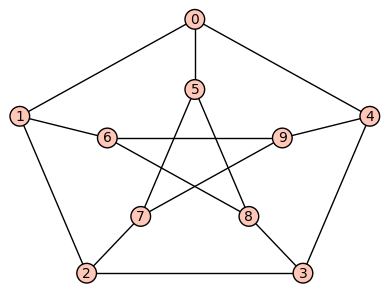

In [10]:
g = graphs.PetersenGraph()
plot(g, figsize=4)

In [11]:
p = MixedIntegerLinearProgram(maximization = False)
b = p.new_variable(binary = True)
p.set_objective( sum([b[v] for v in g]) )

for u,v in g.edges(labels = False):
    p.add_constraint( b[u] + b[v] >= 1 )

p.solve()
b = p.get_values(b)
cover = [v for v,i in b.items() if i]
print cover

[0, 2, 3, 5, 6, 9]


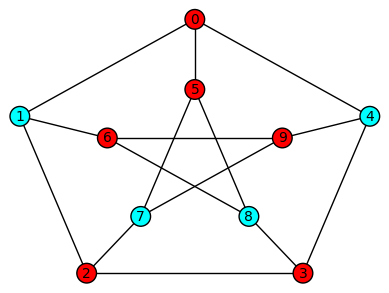

In [12]:
plot(g, partition=[cover], figsize=4)

## Dělení množiny

Rozdělte množinu $\{82, 61, 56, 44, 28, 87, 90, 36, 11, 48, 9\}$ na dvě tak, aby součet čísel v každé podmnožině byl stejný.

**Řešení**: Uspořádejme si čísla do vektoru $v = (82, 61, 56, 44, 28, 87, 90, 36, 11, 48, 9)$, indexujme od $0$. Rozdělení popíšeme binární proměnnou $(b_i)_{i=0}^{10}$. Hodnota $b_i = 0,1$ určuje, do které podmnožiny $i$-té číslo patří. Lineární podmínka, kterou se snažíme splnit, zní
$$ \sum_{i=0}^{10} b_i v_i = \frac{1}{2} \sum_{i=0}^{10} v_i. $$

In [11]:
l = [82, 61, 56, 44, 28, 87, 90, 36, 11, 48, 9]
p = MixedIntegerLinearProgram()
b = p.new_variable(binary = True)
p.add_constraint(p.sum([ v*b[v] for v in l ]) == sum(l)/2)
p.solve();

In [12]:
b = p.get_values(b)
M = [v for v in b if b[v] == 1]
N = [v for v in b if b[v] == 0]
print M, ", sum: ", sum(M)
print N, ", sum: ", sum(N)

[9, 11, 82, 56, 90, 28] , sum:  276
[36, 44, 48, 87, 61] , sum:  276


Pokud úloha nemá řešení, tak jsme na to samozřejmě důrazně upozorněni:

In [13]:
l = [1,3,5]
p = MixedIntegerLinearProgram()
b = p.new_variable(binary = True)
p.add_constraint(p.sum([ v*b[v] for v in l ]) == sum(l)/2)
p.solve();

MIPSolverException: 'GLPK : There is no feasible integer solution to this Linear Program'